In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
x = np.arange(0, 50, 0.1)
y = np.sin(x)

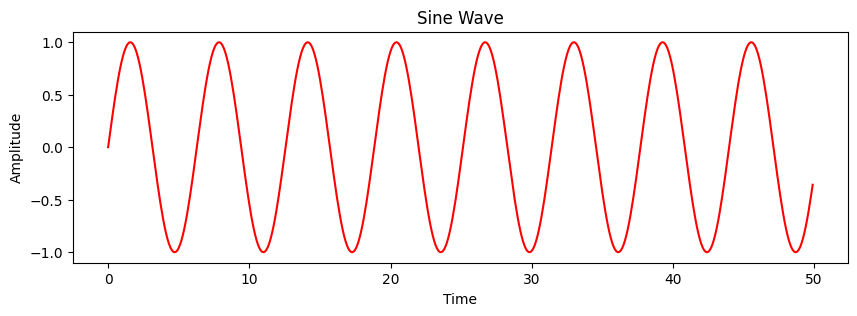

In [3]:
plt.figure(figsize=(10,3))
plt.plot(x,y, c='r')
plt.ylabel("Amplitude")
plt.xlabel('Time')
plt.title("Sine Wave")
plt.show()

In [4]:
import librosa
import librosa.display as ld
import IPython.display as ipd

In [5]:
ipd.Audio('Hello World.mp3')

In [6]:
signal, sr = librosa.load('Hello World.mp3') # SR is sample rate - 22050 samples per second

In [7]:
print(sr)

22050


In [8]:
len(signal)

45864

In [10]:
len(signal)/sr

2.08

In [9]:
signal

array([-5.78882718e-05, -1.61987438e-04, -3.32423006e-05, ...,
       -7.09652901e-04, -4.18864307e-04,  1.03858154e-04], dtype=float32)

### **Waveform**

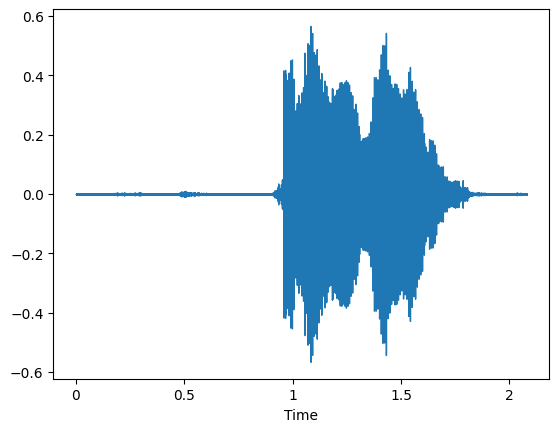

In [11]:
ld.waveshow(signal,sr=sr)

### **Fast Fourier Transform**

Fourier Analysis is the study decomposing mathematical functions into sums of simpler trigonometric functions. Since sound is comprised of oscillating vibrations, we can use Fourier analysis, and Fourier transforms to decompose an audio signal into component sinusoidal functions at varying frequencies.

*   Decompose complex sound into its constituent frequences
Time domain to frequency domain
*   Compare of waveform to multiple sinusoidal signals with varying frequencies
*   For each frequency we get magnitude and phase.
*   Higher Magnitude means higher similarity between the signal and the sinusoid




In [12]:
import scipy as sp

In [13]:
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

In [14]:
print(f"Original {ft[0:2]} and magnitude {np.absolute(ft[0:2])}")

Original [ 1.2925112-0.j         -1.2662787+0.11039072j] and magnitude [1.2925112 1.2710814]


In [15]:
np.absolute(5+12j)

13.0

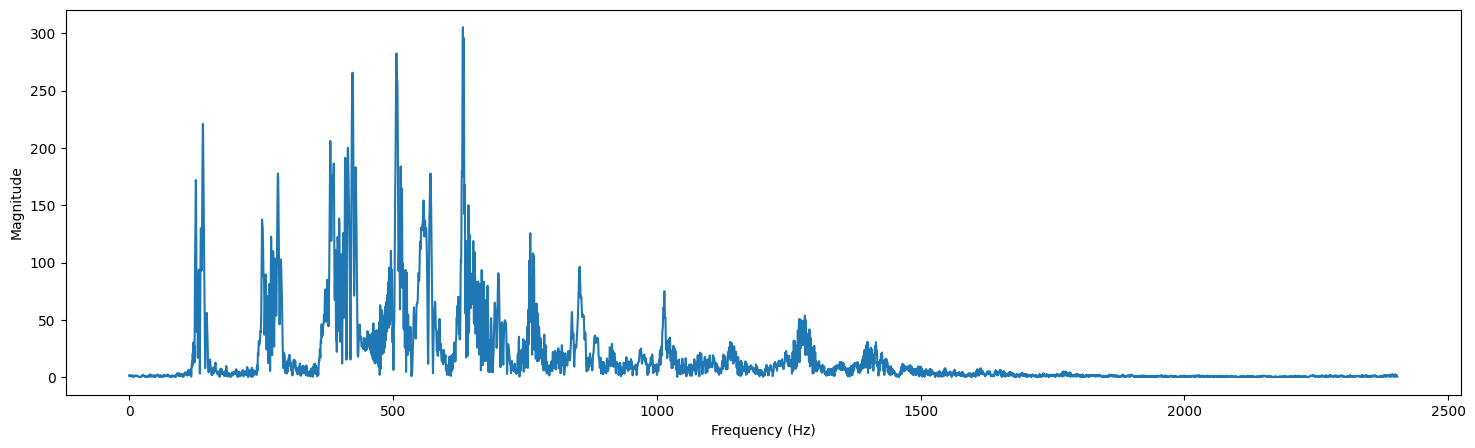

In [17]:
plt.figure(figsize=(18, 5))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

### **Spectrogram**

A spectrogram is the frequency domain representation of the audio signal through time. It's created by splitting the audio signal into component frequencies and plotting them with respect to time. The intensity of color in the spectrogram at any given point indicates the amplitude of the signal. The following reference includes interesting slides showing how sounds in spectrograms can be "read" by experts.

In [18]:
FRAME_SIZE = 2048
HOP_LENGTH = 512

In [19]:
ssft = librosa.power_to_db(abs(librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)))

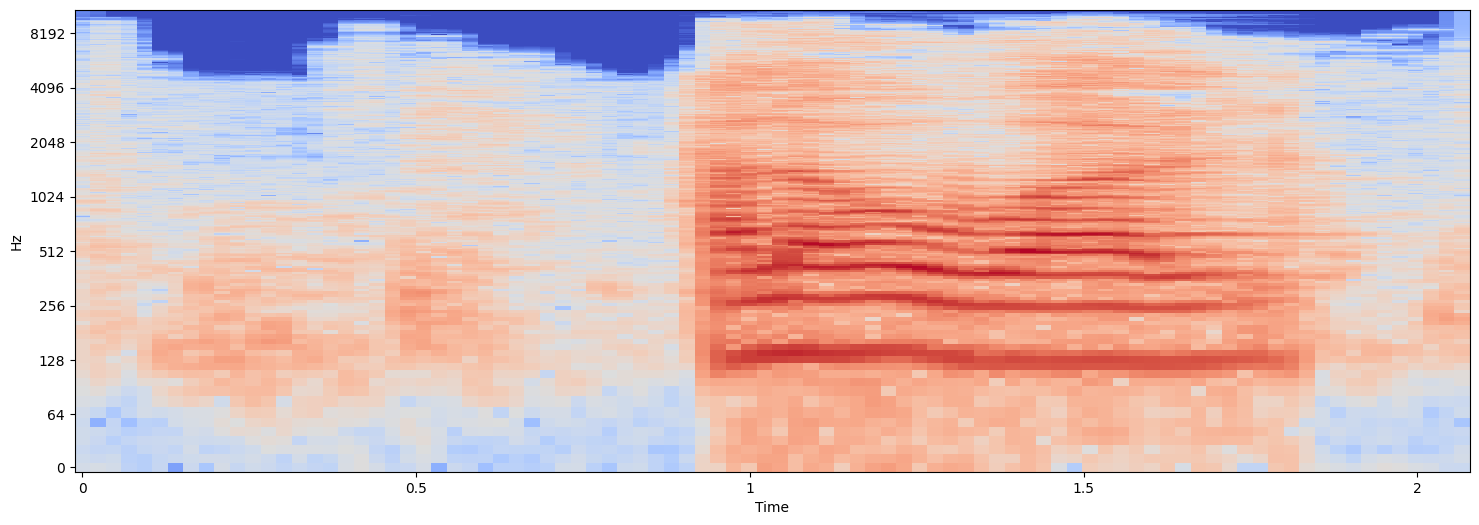

In [20]:
plt.figure(figsize = (18,6))
librosa.display.specshow(ssft,hop_length=HOP_LENGTH, x_axis='time', y_axis='log', sr=sr)

### MFCC
 The mel-frequency cepstrum is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. Mel-frequency cepstral coefficients are coefficients that collectively make up an MFC.

In [21]:
mfcc = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)

In [22]:
mfcc

array([[-5.5153229e+02, -5.1524261e+02, -5.2261719e+02, ...,
        -5.5936237e+02, -5.4251727e+02, -5.3558209e+02],
       [ 4.4801823e+01,  5.7949280e+01,  5.2824043e+01, ...,
         4.8882950e+01,  6.2297287e+01,  5.7745552e+01],
       [ 1.3208239e+01,  5.6538405e+00,  6.1070805e+00, ...,
         3.6187389e+01,  4.1406548e+01,  3.1349236e+01],
       ...,
       [-5.7551632e+00, -1.1611597e+01, -1.2416373e+01, ...,
        -1.3798784e+01, -1.5169906e+01, -6.9164329e+00],
       [-2.7667840e+00, -3.5078909e+00, -5.5766401e+00, ...,
        -1.4452859e+01, -1.0606999e+01, -7.3373508e+00],
       [ 1.4635026e-01,  5.4858789e+00,  4.2753839e+00, ...,
        -1.4822315e+01, -1.0489807e+01, -9.2122335e+00]], dtype=float32)

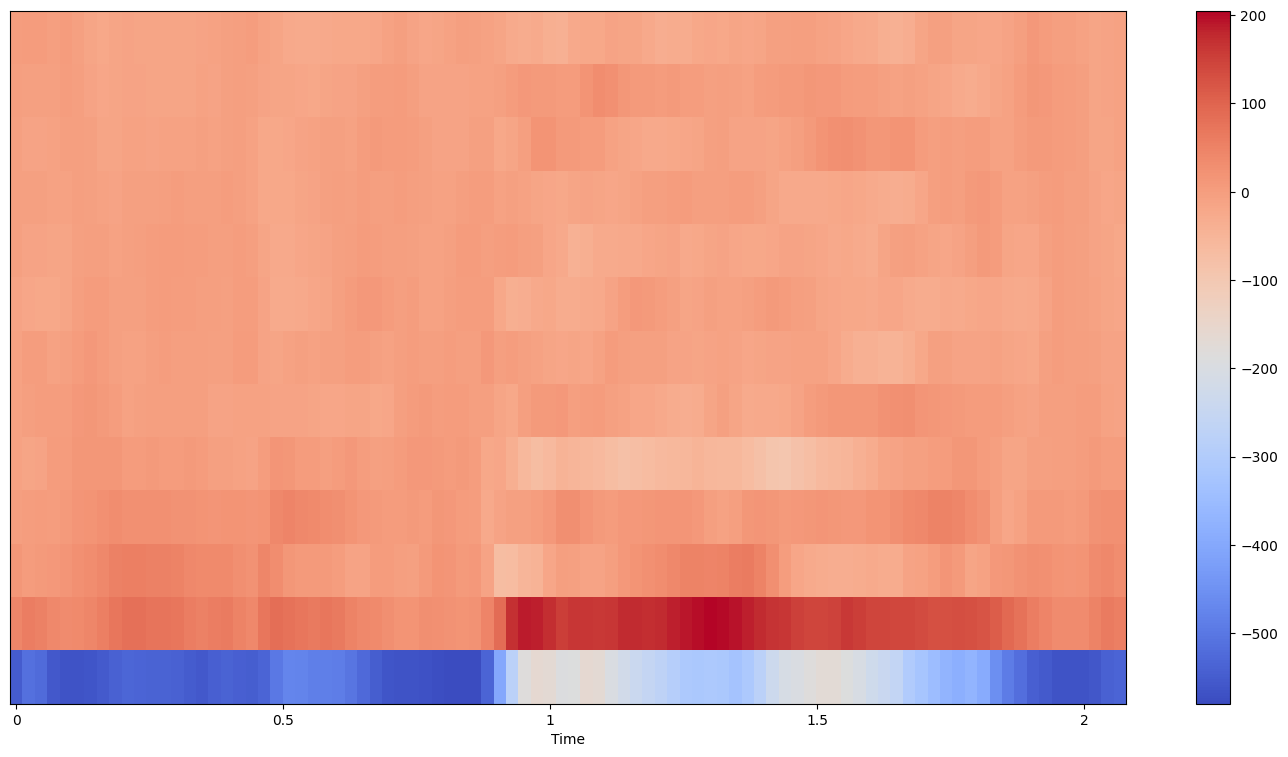

In [ ]:
plt.figure(figsize = (18,9))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.show()

In [ ]:
mfcc.shape

(13, 90)